## Lending Club Case Study

### Business Objectives <br>
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


### Outcome 
Analyse the data provided and come up with factors that may be responsible for loan default

### Contents 
The content of this notebook is divided in below sections :
 1. Data Understanding
 2. Data Cleaning (removing missing values, removing unwanted columns, imputing values, correcting data types,etc)
 3. Data Analysis ( Univariate Analysis, Segmented Univariate Analysis, Bivariate Analysis)
 4. Recommendations


In [318]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #warning
warnings.filterwarnings('ignore')

### Data Understanding

In [319]:
#read the dataset and check the first five rows
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [320]:
#Check the rows and columns of loan data
print('Rows : ', loan_data.shape[0])
print('Columns : ', loan_data.shape[1])

Rows :  39717
Columns :  111


In [321]:
# Looking at all the column names
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [322]:
# checking details of loan data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Some of the important columns that we will be analysing are __loan_amnt, int_rate, grade, subgrade, home_ownership, annual_inc, verification_status, purpose, dti, loan_status__ <br>

The main variable that we will be comparing across differnt variables is __loan_status__. We will try to identify which variables has direct impact on loan default.


### Data Cleaning

In [323]:
#Check the null values of all the columns of the dataframe
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [324]:
#Remove columns which has na values in all rows
loan_data= loan_data.dropna(axis=1, how='all')

All Columns which has null values in all rows are dropped

In [325]:
#Check the rows and columns of loan data
print('Rows : ', loan_data.shape[0])
print('Columns : ', loan_data.shape[1])

Rows :  39717
Columns :  57


In [326]:
# check percentage of missing values in each column
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [327]:
# There are now 3 columns having approx 33, 65, 93 and 97% missing values - 
# description, mths_since_last_delinq, mths_since_last_record  and next_pymnt_d since last delinquent

#drop columns having null values more than 90%
loan_data=loan_data.drop(['mths_since_last_record','next_pymnt_d'], axis =1)


In [328]:
# let's have a look at a reamining entries in the columns
loan_data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


Desc column is free text field and from the data we will not be able to conclude anything.Hence drop this column. <br>
mths_since_last_delinq contains the data after the loan is approved. Hence drop this columns as well.

In [329]:
# dropping the two columns
loan_data = loan_data.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [330]:
# check the number of missing values again
100*(loan_data.isnull().sum()/len(loan_data.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [331]:
# check variance of the column data
loan_data.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
pub_rec                       5.626382e-02
revol_bal                     2.523338e+08
total_acc                     1.299990e+02
out_prncp                     1.407547e+05
out_prncp_inv                 1.397447e+05
total_pymnt                   8.175850e+07
total_pymnt_inv               7.997139e+07
total_rec_prncp               4.992160e+07
total_rec_int                 6.802248e+06
total_rec_late_fee            5.314380e+01
recoveries                    4.743694e+05
collection_recovery_fee       2.210324e+04
last_pymnt_

Columns which are having approx. 0 variance should be dropped and the data in it does not chnage much.

In [332]:
loan_data= loan_data.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

In [333]:
#Check the rows and columns of loan data
print('Rows : ', loan_data.shape[0])
print('Columns : ', loan_data.shape[1])

Rows :  39717
Columns :  47


In [334]:
# Check object types for the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [335]:
#int_rate - create column int_rate_per with float type
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : x.replace("%","")).astype("float")

In [336]:
#extract the numeric part from the variable employment length

# drop the missing values from the column emp_length
loan_data = loan_data[~loan_data['emp_length'].isnull()]


In [337]:
# remove years from the emp_length column and convert to int
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x :((x.replace("years","")).replace("+","")).replace("<",""))
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x : x.replace("year","")).astype("int32")

In [338]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt              38642 non-null  int64  
 4   funded_amnt_inv          38642 non-null  float64
 5   term                     38642 non-null  object 
 6   int_rate                 38642 non-null  float64
 7   installment              38642 non-null  float64
 8   grade                    38642 non-null  object 
 9   sub_grade                38642 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               38642 non-null  int32  
 12  home_ownership           38642 non-null  object 
 13  annual_inc               38642 non-null  float64
 14  verification_status   

### Data Analysis
Understand the different columns and its usage and clearly identify variables that will be used in analysis. <br>
Now, broadly there are 3 types of variables :
 1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
 2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
 3. Customer behaviour variables (those which are generated after the loan is approved)
 
Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

In [339]:
# grouping of customer behaviour variables
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [340]:
# let's now remove the behaviour variables from analysis
loan_data = loan_data.drop(behaviour_var, axis=1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int32  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

In [341]:
# we will not be able to use the variables id, member_id, zip_code, pymnt_plan, url, initial_list_status,funded_amnt, funded_amnt_inv, etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

loan_data = loan_data.drop(['id','member_id','title', 'url', 'zip_code', 'pymnt_plan','url','initial_list_status','funded_amnt','funded_amnt_inv'], axis=1)

Remove the Current loan status as they are not completed nor defaulted

In [342]:
# Keep fully paid or charged-off
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].astype(int)

# checking the values of loan_status
loan_data['loan_status'].value_counts()


0    32145
1     5399
Name: loan_status, dtype: int64

In [343]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   term                  37544 non-null  object 
 2   int_rate              37544 non-null  float64
 3   installment           37544 non-null  float64
 4   grade                 37544 non-null  object 
 5   sub_grade             37544 non-null  object 
 6   emp_title             36136 non-null  object 
 7   emp_length            37544 non-null  int32  
 8   home_ownership        37544 non-null  object 
 9   annual_inc            37544 non-null  float64
 10  verification_status   37544 non-null  object 
 11  issue_d               37544 non-null  object 
 12  loan_status           37544 non-null  int32  
 13  purpose               37544 non-null  object 
 14  addr_state            37544 non-null  object 
 15  dti                

### Data Analysis : Univariate

In [344]:
#fetching and identifying remaining columns that can be used in analysis
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

#### Loan Status Analysis

0    85.61954
1    14.38046
Name: loan_status, dtype: float64


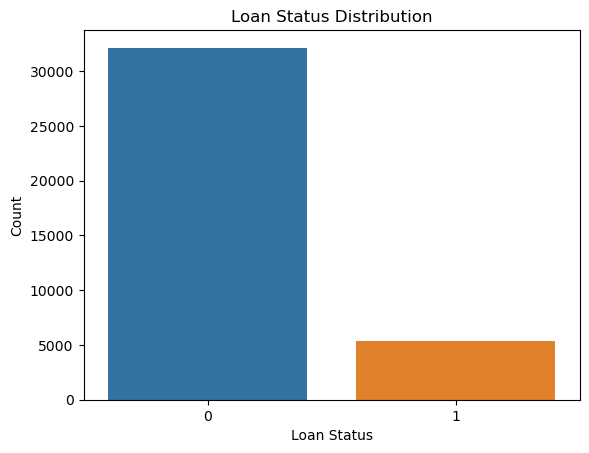

In [345]:
#calculate percentage of loan paid versus chnarged off
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())


# 0=Fully Paid, 1=Charged Off
sns.countplot(x ='loan_status', data = loan_data)

# Add title and axis names
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

__Interpretation__ - Fully paid load are 85% of total loan approved. So, Defaulted load are low as compared to Fully Paid loans

#### Loan Term Analysis

 36 months    75.343597
 60 months    24.656403
Name: term, dtype: float64


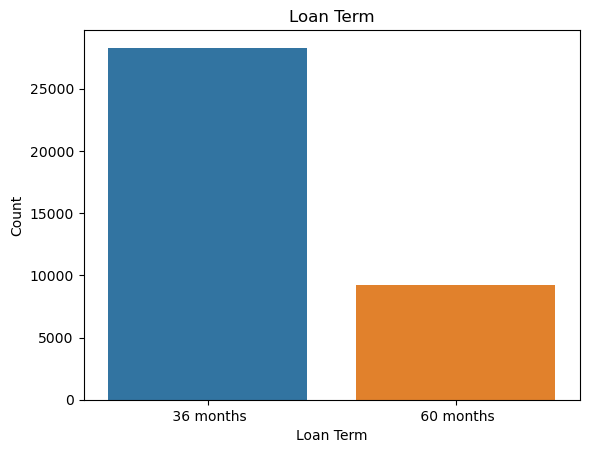

In [346]:
#calculate percentage of loan terms for various tensures
print(loan_data.term.value_counts()*100/loan_data.term.count())

sns.countplot(x ='term', data = loan_data)

# Add title and axis names
plt.title('Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

__Interpretation__ : 36 months loan terms is more popular as compared to 60 month loan term.

#### Interest Rate Analysis.

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


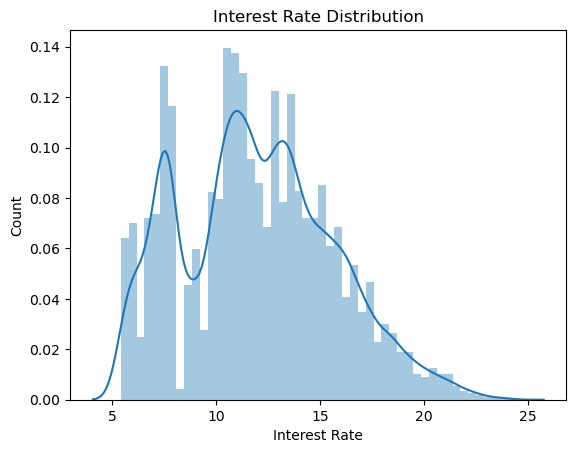

In [347]:
# interest rate analysis
print(loan_data.int_rate.describe())

# plot distribution plot for loan_amnt
sns.distplot(loan_data['int_rate'])

# Add title and axis names
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Interest rate varies from 5% to 24% having average of 12%. Less loan were approved having interest rate greater than 15%.

#### Grade Analysis

B    30.255167
A    25.729810
C    20.426699
D    13.261773
E     6.978479
F     2.554336
G     0.793735
Name: grade, dtype: float64


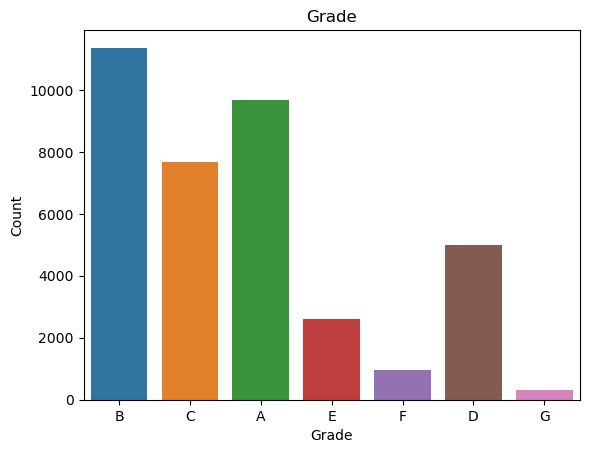

In [348]:
#calculate percentage for grade allocations
print(loan_data.grade.value_counts()*100/loan_data.grade.count())

sns.countplot(x ='grade', data = loan_data)

# Add title and axis names
plt.title('Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Grade A & B holders holds most of the approved loans.

#### Employment Duration Analysis.

10    22.608140
1     20.448008
2     11.429256
3     10.686128
4      8.901556
5      8.507351
6      5.774558
7      4.557319
8      3.822182
9      3.265502
Name: emp_length, dtype: float64


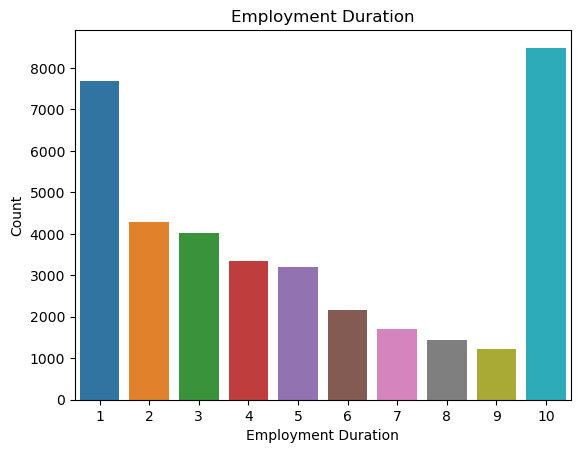

In [349]:
#calculate percentage for employment duration versus total loans
print(loan_data.emp_length.value_counts()*100/loan_data.emp_length.count())

sns.countplot(x ='emp_length', data = loan_data)

# Add title and axis names
plt.title('Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Majority of loan holders are having less than 1 year or more than 10 year work experience.

#### Home Ownership Analysis

RENT        48.151502
MORTGAGE    44.201470
OWN          7.378010
OTHER        0.261027
NONE         0.007991
Name: home_ownership, dtype: float64


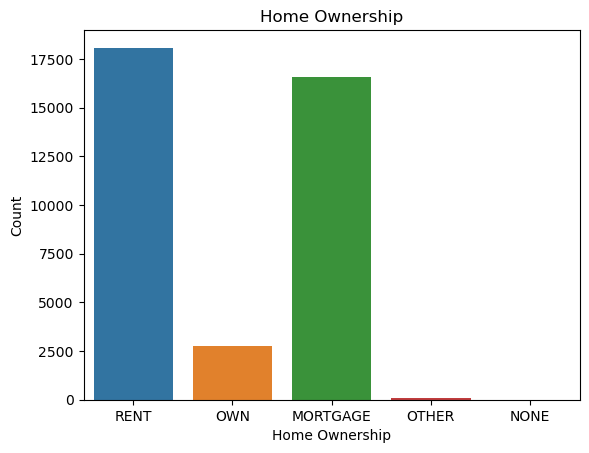

In [350]:
#calculate percentage for home_ownership versus total loans
print(loan_data.home_ownership.value_counts()*100/loan_data.home_ownership.count())

sns.countplot(x ='home_ownership', data = loan_data)

# Add title and axis names
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Most of the loan were taken by loan holder who are staying on rent or taken mortage.

#### Loan Amount Analysis

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


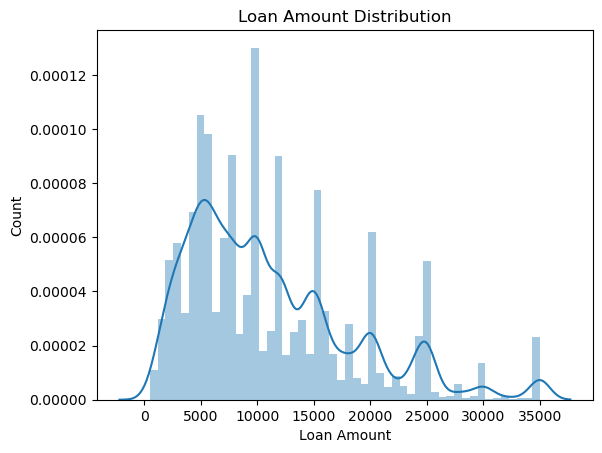

In [351]:
# Loan amount analysis
print(loan_data.loan_amnt.describe())

# plot distribution plot for loan_amnt
sns.distplot(loan_data['loan_amnt'])

# Add title and axis names
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Loan amount varies from 500 to 35000. Most of the loan amount is around 5000 - 10000.

####  Annual Income Analysis

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


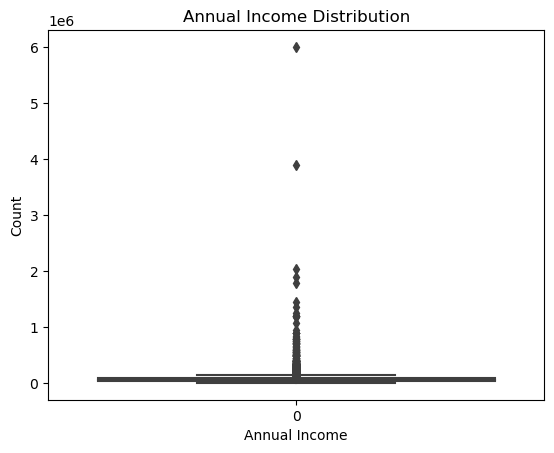

In [352]:
# Annual Income analysis
print(loan_data.annual_inc.describe())

# plot box plot for loan_amnt
sns.boxplot(loan_data['annual_inc'])

# Add title and axis names
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

count     37530.000000
mean      68720.747033
std       47511.321260
min        4000.000000
25%       41000.000000
50%       60000.000000
75%       83000.000000
max      948000.000000
Name: annual_inc, dtype: float64


<Axes: >

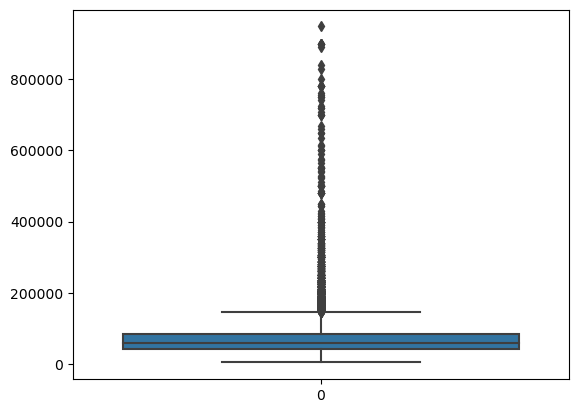

In [353]:
##Outlier removal
## as per the plot most of the income is around 1000000. so removing data above it from the loan data
annual_income_data = loan_data[loan_data['annual_inc']<1000000]

# Annual Income analysis
print(annual_income_data.annual_inc.describe())

# plot box plot for loan_amnt
sns.boxplot(annual_income_data['annual_inc'])

__Interpretation__ : Most of the loan holders ar having low income as compared to others.

#### Verification Status Analysis

Not Verified       43.357128
Verified           31.355210
Source Verified    25.287662
Name: verification_status, dtype: float64


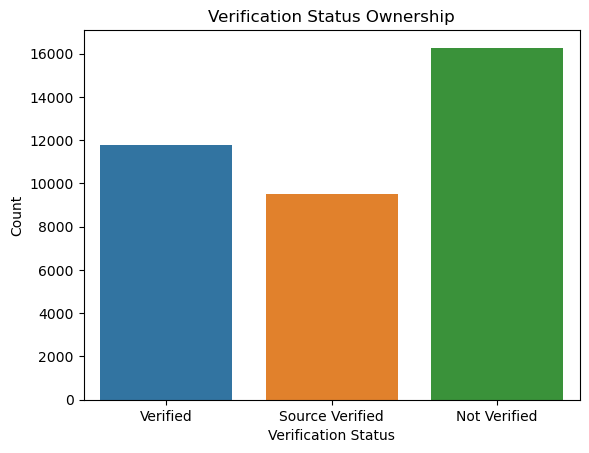

In [354]:
#calculate percentage for verification status versus total loans
print(loan_data.verification_status.value_counts()*100/loan_data.verification_status.count())

sns.countplot(x ='verification_status', data = loan_data)

# Add title and axis names
plt.title('Verification Status Ownership')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Most of the loan were approved where status of applicant was not verified.

#### Loan Purpose Analysis

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64


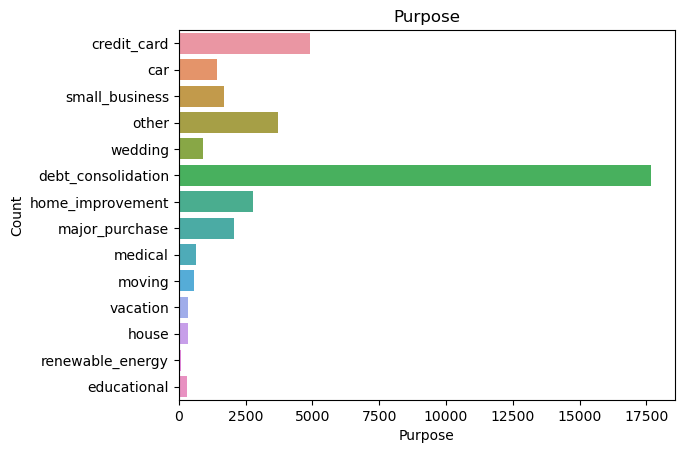

In [355]:
#calculate percentage for purpose versus total loans
print(loan_data.purpose.value_counts()*100/loan_data.purpose.count())

sns.countplot(y ='purpose', data = loan_data)

# Add title and axis names
plt.title('Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Large amount of loan was given for debt consolidation.

#### Debt to Income Ratio Analysis

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64


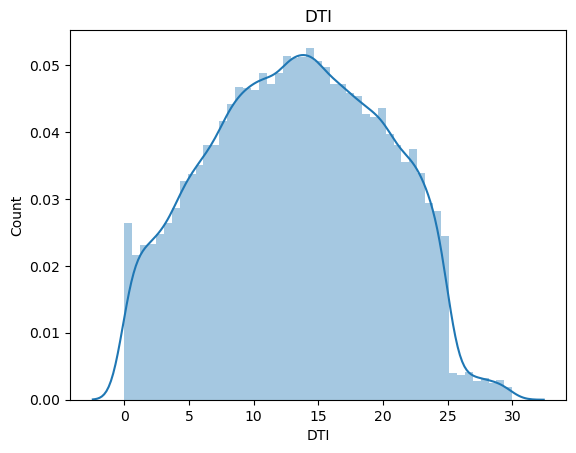

In [356]:
# DTI analysis
print(loan_data.dti.describe())

# plot distribution plot for loan_amnt
sns.distplot(loan_data['dti'])

# Add title and axis names
plt.title('DTI')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Most of loan holders have high debt to income ratio.

#### Loan Issue Date Analysis

In [357]:
#converting issue_d in issue year and issue month derived columns
loan_data['issue_month'] = pd.to_datetime(loan_data['issue_d'], format ='%b-%y').dt.month
loan_data['issue_year'] = pd.to_datetime(loan_data['issue_d'], format ='%b-%y').dt.year

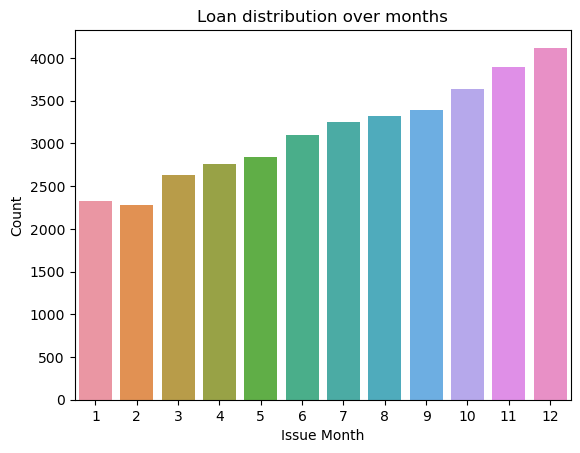

In [358]:
sns.countplot(x ='issue_month', data = loan_data)

# Add title and axis names
plt.title('Loan distribution over months')
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Most of the loans were approved at the end of the year.


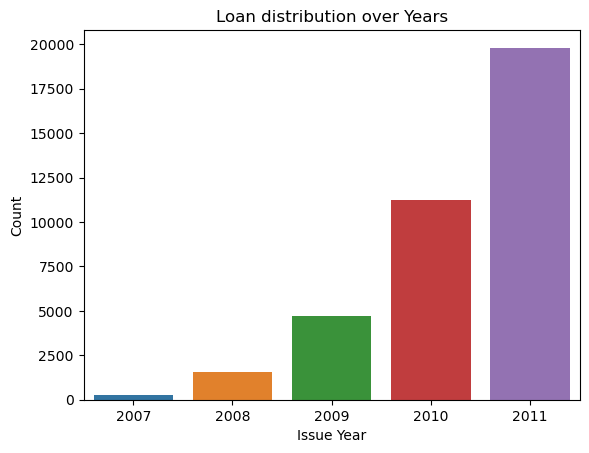

In [359]:
sns.countplot(x ='issue_year', data = loan_data)

# Add title and axis names
plt.title('Loan distribution over Years')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Most number of loans were approved in 2011. Loan trend seems to increase with passing years.

### Segmented Univariate Analysis

#### Loan Status vs Loan Amount

In [360]:
# create derived column for categorizing loan amount

def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_data['loan_amnt_cat'] = loan_data['loan_amnt'].apply(lambda x: loan_amount(x))

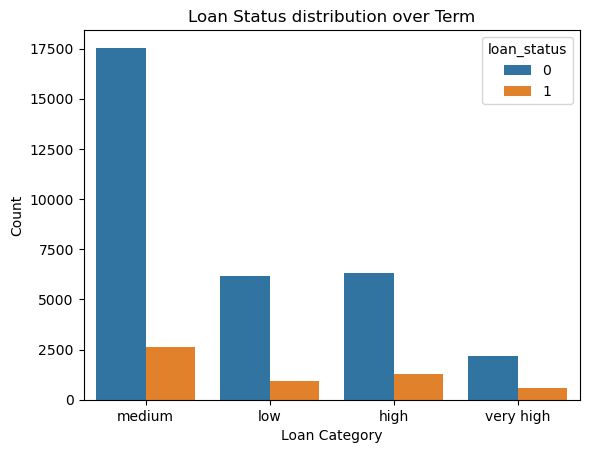

In [361]:
sns.countplot(x='loan_amnt_cat', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Term')
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Loan default are higher as loam amount increases.

#### Loan Status vs Interest Rate

In [362]:
# create derived column for categorizing interest rate

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_data['int_rate_cat'] = loan_data['int_rate'].apply(lambda x: int_rate(x))

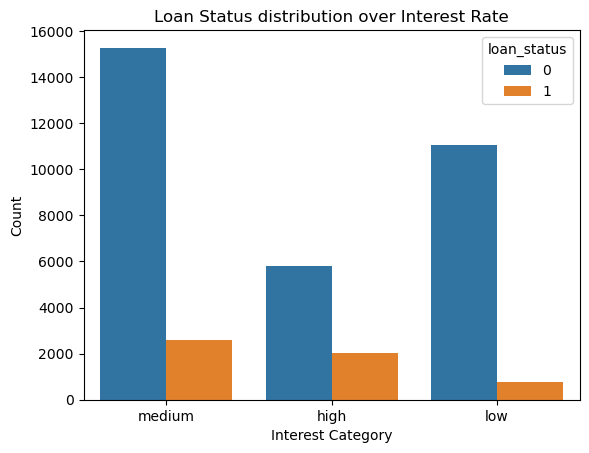

In [363]:
sns.countplot(x='int_rate_cat', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Interest Rate')
plt.xlabel('Interest Category')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Loan defaults are more as interest rate increases.

#### Loan Status vs DTI

In [364]:
# create derived column for categorizing DTI

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_data['dti_cat'] = loan_data['dti'].apply(lambda x: dti(x))

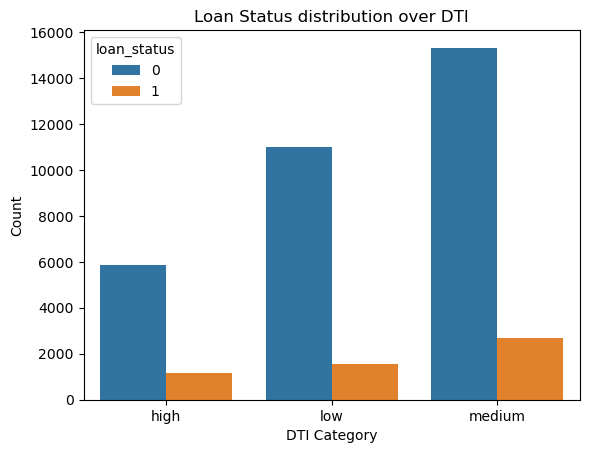

In [365]:
sns.countplot(x='dti_cat', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over DTI')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Loan defaults are more as DTI increases.

#### Loan Status vs Installments

In [366]:
# create derived column for categorizing Installment

def installment(n):
    if n <= 250:
        return 'low'
    elif n > 250 and n <=500:
        return 'medium'
    elif n > 500 and n <=750:
        return 'high'
    else:
        return 'very high'
    
loan_data['installment_cat'] = loan_data['installment'].apply(lambda x: installment(x))

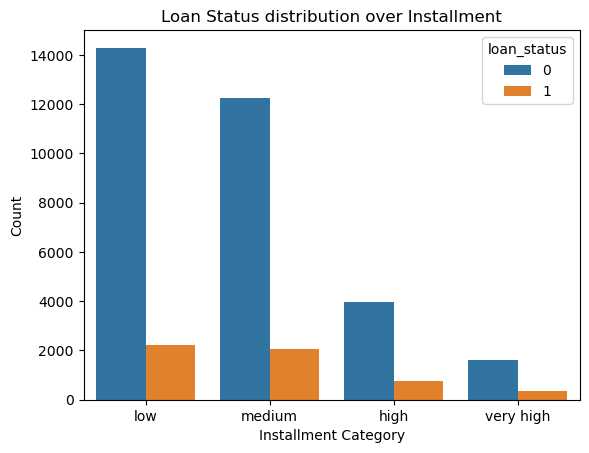

In [367]:
sns.countplot(x='installment_cat', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Installment')
plt.xlabel('Installment Category')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Loan defaults increases as installment increases

#### Loan status vs Annual Salary

In [368]:
# create derived column for categorizing Annual Income

def annual_income(n):
    if n <= 100000:
        return 'low'
    elif n > 100000 and n <=200000:
        return 'medium'
    elif n > 200000 and n <=300000:
        return 'high'
    else:
        return 'very high'

loan_data['annual_inc_cat'] = loan_data['annual_inc'].apply(lambda x: annual_income(x))

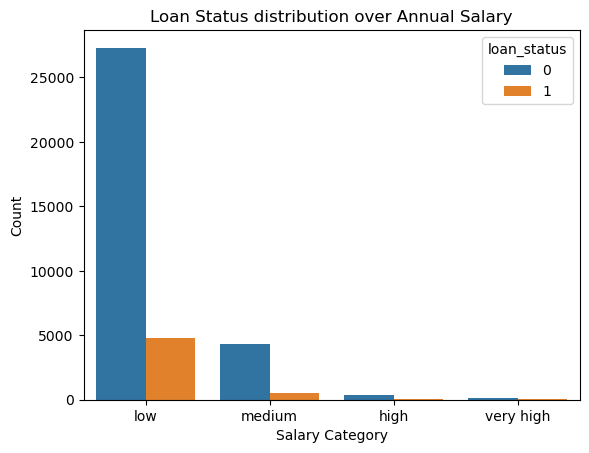

In [369]:
sns.countplot(x='annual_inc_cat', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Annual Salary')
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.show()

__Interpretation__ :  Default loans are more with people having less salary.

#### Loan Status vs Term

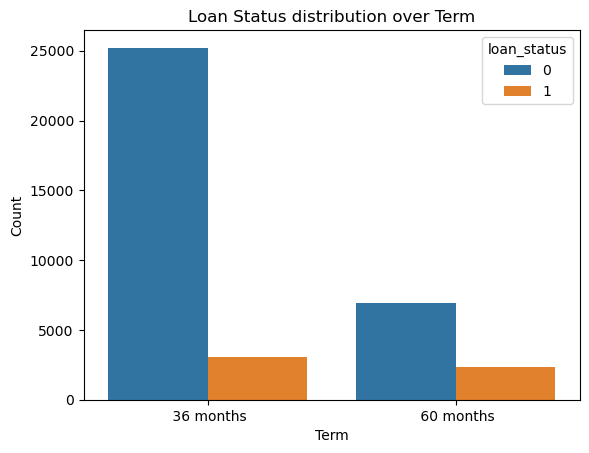

In [370]:
sns.countplot(x='term', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Chances of getting loan fully paid is more in 36 months term period tha 60 month term period.

#### Loan Status vs Grade

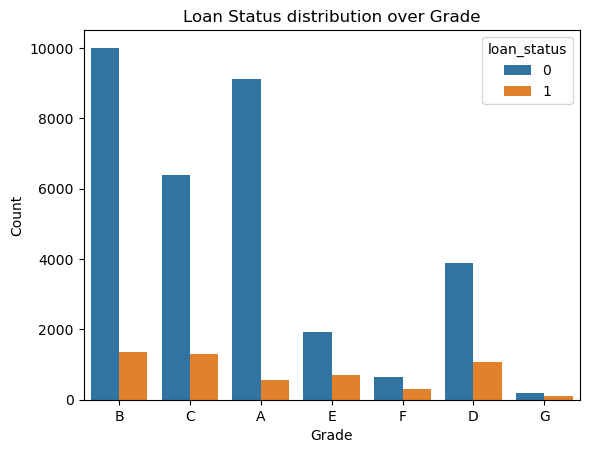

In [371]:
sns.countplot(x='grade', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

__INterpretation__ : Grade D, E, F & G have more chances of loan default.

#### Loan Status vs Employment Length

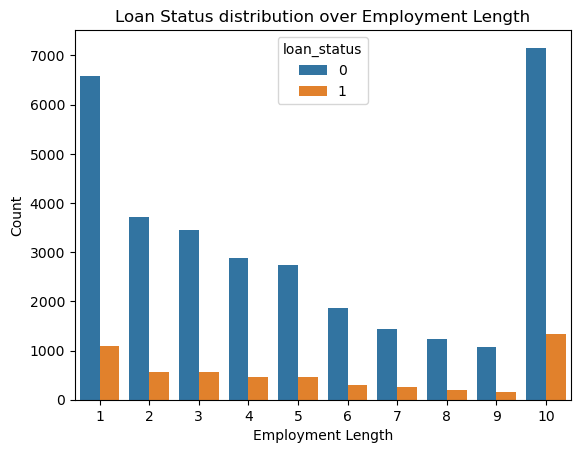

In [372]:
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Employee having less than one year OR more than 10 years has more chances to pay the loan amount.

#### Loan Status vs Home Ownership

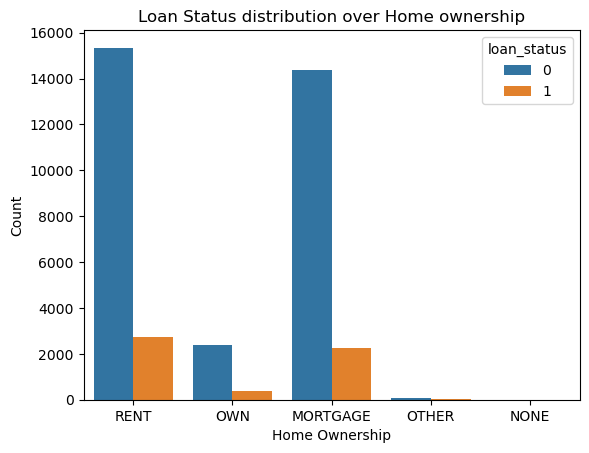

In [373]:
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Home ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

__Interpretation__ : People staying on rent & mortage has better chances of paying loan.

#### Loan Status vs Verification Status

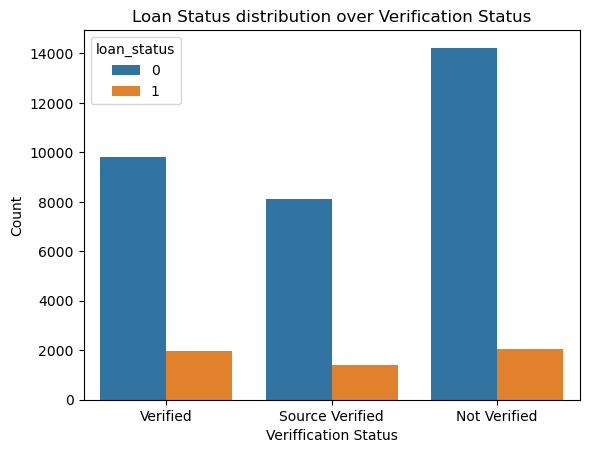

In [374]:
sns.countplot(x='verification_status', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Verification Status')
plt.xlabel('Veriffication Status')
plt.ylabel('Count')
plt.show()

__Interpretation__ : Not verified status loan holder has slightly more chnages of defaulting loan

#### Loan Status versus Issue Year

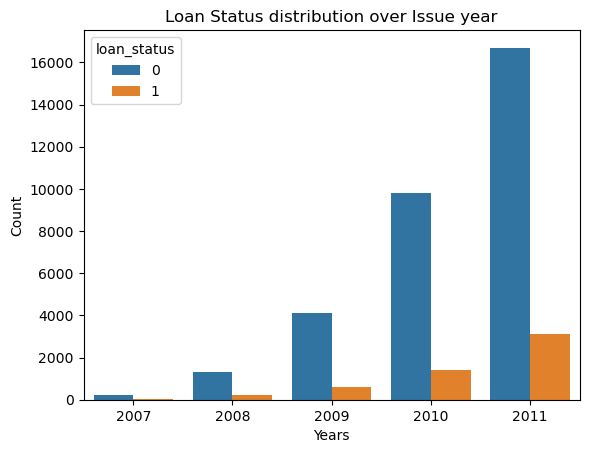

In [375]:
sns.countplot(x='issue_year', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Issue year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

__Interpretation__ : There is growing trend of fully paid loans as well as defaulting loans as the year increases.

#### Loan Status vs Purpose

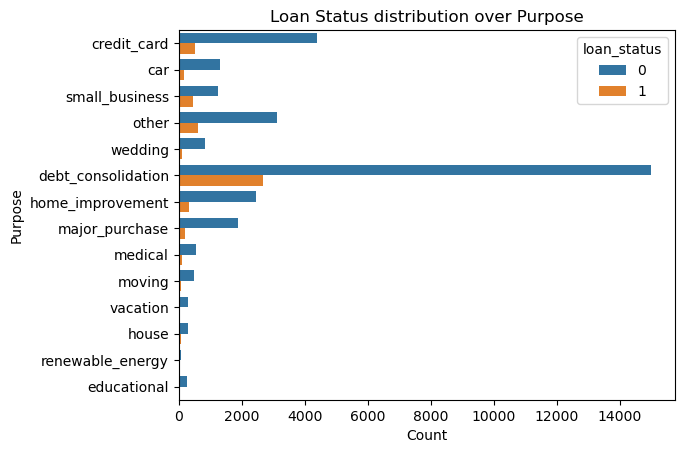

In [376]:
sns.countplot(y='purpose', hue='loan_status', data=loan_data)

# Add title and axis names
plt.title('Loan Status distribution over Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

__Interpretation__ : debt consolidation has better chances of paying the loan.

### Bivariate Analysis

#### Loan Status vs Interest Rate

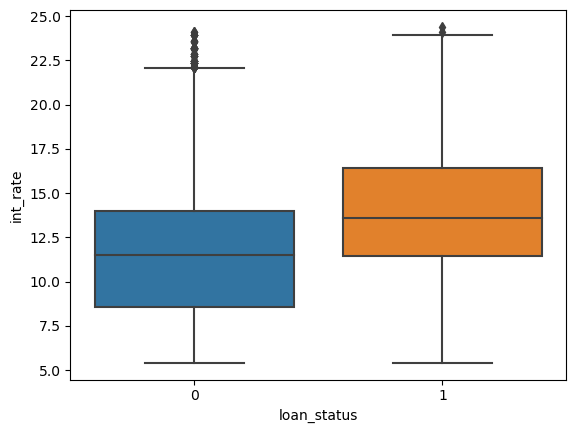

In [377]:
#Analyze the relationship between loan status and int_rate
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=loan_data)
plt.show()

__Interpretation__ : Loan defaults are more as interest rate increases.

#### grade vs interest rate

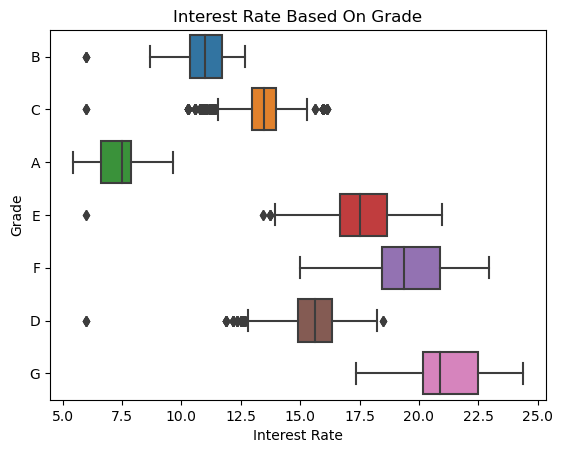

In [378]:
# Comparison of interest rate based on grade
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Interest Rate Based On Grade',fontsize=12)
plt.show()

__Interpretation__ : Interest rate increases with decrease of grade

#### HeatMap

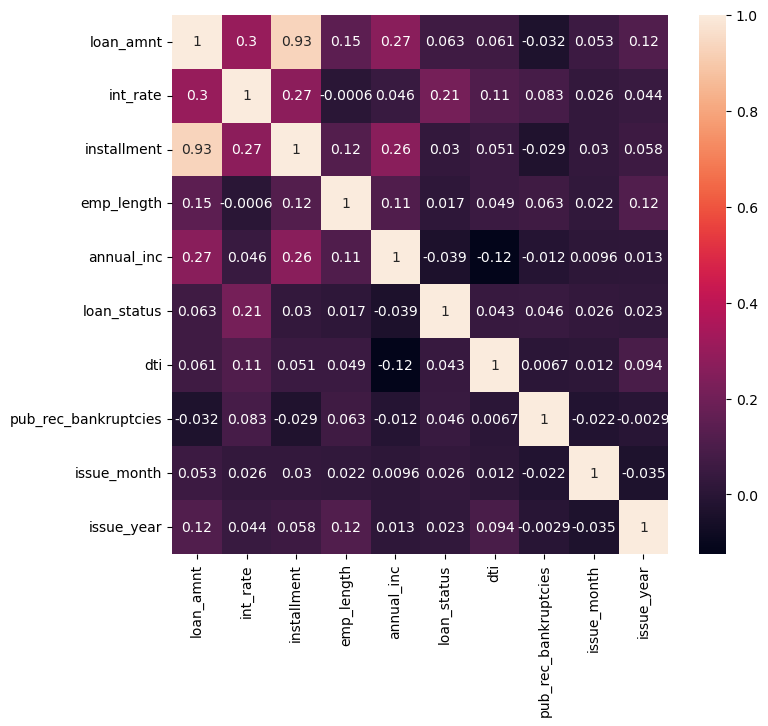

In [379]:
plt.figure(figsize=(8,7))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

__Interpretation__ : <br>
1. Interest rate rises as Loan amount increases.
2. Interest rate has impact in loan status.
3. Interest rate has impact on installment.

## Understanding from Data Analysis

### Univariate Analysis
1. Defaulted Loan are low as completed to Fully Paid loans
2. 36 months teem loan is common as compared to 60 months term period.
3. Lower loans were approved at higher interest rates.
4. Grade A, B & C holds most of the approved loans.
5. Most of loan approved are from employee having less tha 1 yesr experience or more than 10 year experience.
6. Most of loan approved are from borrower staying on rent or on mortage.
7. Most number of loans were approved for people having loan amount of 5000-10000. It decreases as the loan amount increases.
8. Most of loan approved are for people having low income.
9. Highest number of loan were approved for unverified people.
10. Highest number of loan approved for purpose - debt consolidation.
11. Most of the loan holders as high dti.
12. Most number of loan were issued in last quarter of a year.
13. Loan approved are increasing with increase is year.


### Segmented Univariate Analysis
1. Loan defaults are higher as loan amount increases.
2. Loan  defaults are higher as interest rate increases.
3. Loan  defaults are higher as dti increases.
4. Loan  defaults are higher as installment increases.
5. Loan  defaults are higher for people having less annual income.
6. Loan  defaults are higher as loan term increases.
7. Loan defaults are more with people having grade as D, E, F & G.
8. Loan defaults are more with people having 2-9 years of experience.
9. Loan defaults are more with people having verified or source verified status.
10. Loan default are increasing with increase of year.
11. people taking loan for debt consilidation have higher chances of default as well as fully paid loans.


### Bivariate Analysis
1. Loan defaults are more as interest rate increases.
2. Interest rate increases with decrease of Grade.
3. Interest rate rises as Loan amount increases.

### Recommendation
Below variables need to be considered for loan defaults
1. Grade
2. Interest Rate
3. Loan Term
4. Installment
5. DTI
6. Annual Income
7. Loan Purpose